<a href="https://colab.research.google.com/github/Rahullnitp/Epilepsy_Detection/blob/master/epilepsy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/epilepsy_sham

/content/gdrive/My Drive/epilepsy_sham


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [0]:
xls = pd.ExcelFile('/content/gdrive/My Drive/epilepsy_sham/new_epilepsy.xlsx')
data = pd.read_excel(xls, 'SZONF')
label = pd.read_excel(xls, 'targetS-ZONF')

In [0]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 4057,Unnamed: 4058,Unnamed: 4059,Unnamed: 4060,Unnamed: 4061,Unnamed: 4062,Unnamed: 4063,Unnamed: 4064,Unnamed: 4065,Unnamed: 4066,Unnamed: 4067,Unnamed: 4068,Unnamed: 4069,Unnamed: 4070,Unnamed: 4071,Unnamed: 4072,Unnamed: 4073,Unnamed: 4074,Unnamed: 4075,Unnamed: 4076,Unnamed: 4077,Unnamed: 4078,Unnamed: 4079,Unnamed: 4080,Unnamed: 4081,Unnamed: 4082,Unnamed: 4083,Unnamed: 4084,Unnamed: 4085,Unnamed: 4086,Unnamed: 4087,Unnamed: 4088,Unnamed: 4089,Unnamed: 4090,Unnamed: 4091,Unnamed: 4092,Unnamed: 4093,Unnamed: 4094,Unnamed: 4095,Unnamed: 4096
0,100,124,153,185,210,220,216,222,240,265,298,330,362,381,391,390,390,392,395,397,397,393,380,356,334,322,320,322,338,332,317,263,195,142,108,97,80,80,85,39,...,516,592,650,667,637,574,505,450,413,399,414,448,486,449,291,-46,-457,-878,-1178,-1324,-1310,-1105,-770,-345,42,315,465,513,478,378,250,137,57,17,0,7,26,57,95,462
1,340,353,400,470,538,590,611,629,649,693,759,837,812,684,389,-231,-1250,-1768,-1816,-1637,-984,-476,-224,-14,165,314,408,454,467,437,412,379,376,339,302,248,200,174,144,152,...,304,254,82,-174,-467,-537,-450,-178,64,274,464,496,571,467,299,130,28,82,270,597,886,1071,1166,1146,1000,773,423,118,-75,-18,205,556,824,919,916,829,722,512,130,196
2,-310,93,494,789,798,552,202,-95,-262,-327,-420,-483,-508,-502,-459,-376,-266,-113,18,98,135,154,163,174,186,196,208,216,218,208,200,197,197,201,211,224,239,246,252,261,...,-21,-12,29,75,111,145,168,169,150,113,106,137,204,291,388,477,546,574,546,467,360,255,164,123,126,184,312,410,470,496,437,345,108,-216,-525,-735,-847,-721,-491,910
3,84,75,21,-68,-138,-184,-197,-186,-155,-111,-58,-26,-18,-18,-40,-56,-35,35,149,253,298,282,232,161,96,71,64,70,35,-45,-116,-169,-192,-196,-173,-131,-82,-38,-8,-4,...,-91,-191,-246,-261,-248,-228,-197,-172,-150,-133,-123,-113,-109,-93,-71,-54,-42,-32,-17,29,110,200,271,285,236,142,50,-15,-61,-83,-119,-148,-171,-195,-218,-234,-238,-209,-165,-212
4,343,311,284,274,260,237,165,-33,-271,-425,-418,-254,-104,-14,16,24,23,11,4,20,40,67,99,127,130,126,133,124,108,54,-5,-45,-61,-65,-52,-46,-25,-15,-4,-12,...,2,-70,-118,-155,-201,-283,-368,-363,-333,-271,-203,-126,-31,48,86,102,124,125,132,144,187,263,343,411,433,417,397,395,414,435,439,428,423,430,472,515,527,480,397,217


In [0]:
new_data=[]
[new_data.extend((data.iloc[:,i*178:(i+1)*178]).values.tolist()) for i in range(23)]
new_data=pd.DataFrame(new_data)

In [0]:
new_data.shape

(11500, 178)

In [0]:
new_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1857.000000,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.000000,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.0

In [0]:
new_label=pd.concat([label]*23, ignore_index=True)

In [0]:
new_label.shape

(11500, 1)

In [0]:
y=new_label['target']

In [0]:
new_data[new_label['target'] == 0].describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.00000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,...,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,-8.992609,-8.877174,-8.910435,-8.969783,-9.085326,-9.436848,-9.852500,-10.215326,-10.292717,-10.404022,-10.364565,-10.201630,-9.79587,-9.366739,-8.933370,-8.571413,-8.110217,-7.871304,-7.634674,-7.685000,-7.745000,-7.812935,-7.992174,-8.290000,-8.378152,-8.378043,-8.050217,-7.779565,-7.553696,-7.651304,-7.742609,-7.641957,-7.458261,-7.323913,-7.160978,-7.063370,-7.102391,-7.456304,-7.752391,-7.936196,...,-7.411087,-7.890000,-8.027174,-8.350326,-8.290217,-8.423043,-8.690543,-9.045326,-9.238478,-9.442391,-9.456848,-9.297609,-8.963043,-8.554674,-8.420870,-8.397500,-8.543696,-8.616848,-8.699457,-8.817174,-8.752500,-8.733261,-8.816522,-9.101304,-9.475978,-9.708370,-9.874891,-9.836196,-10.008587,-9.954783,-10.056957,-10.253478,-10.560543,-10.583587,-10.479891,-10.148696,-9.848587,-9.620435,-9.395435,-9.240435
std,70.455286,70.560110,70.372582,70.030409,69.377958,69.291403,69.555105,69.635977,69.139111,68.502271,68.039712,67.707075,67.87930,68.155359,68.105652,67.985931,67.778565,67.839717,68.593492,69.916108,70.574751,70.318706,69.693689,68.638105,67.899185,67.595766,66.763455,65.973156,64.885648,64.244725,64.152115,64.853603,65.808491,66.125886,65.689990,64.814245,64.301839,64.610141,65.066122,65.347316,...,75.591411,75.892771,76.642447,77.640952,78.413501,77.956269,77.705528,77.045022,76.638563,75.126036,73.163762,71.448877,70.240233,69.054315,68.287824,67.347611,66.325524,65.528370,64.938860,64.664958,64.679244,64.799435,64.793998,64.742012,64.902284,66.162189,68.300686,69.655027,70.112188,70.092532,69.856421,68.825267,68.028089,67.878426,68.128134,68.868079,69.550894,70.353607,70.934300,71.185850
min,-566.000000,-609.000000,-594.000000,-549.000000,-603.000000,-801.000000,-956.000000,-1092.000000,-784.000000,-769.000000,-746.000000,-680.000000,-590.00000,-541.000000,-551.000000,-502.000000,-440.000000,-475.000000,-577.000000,-637.000000,-681.000000,-600.000000,-407.000000,-431.000000,-480.000000,-835.000000,-725.000000,-802.000000,-625.000000,-424.000000,-376.000000,-401.000000,-459.000000,-508.000000,-595.000000,-625.000000,-605.000000,-699.000000,-796.000000,-839.000000,...,-512.000000,-561.000000,-584.000000,-578.000000,-552.000000,-535.000000,-543.000000,-709.000000,-1147.000000,-1128.000000,-1082.000000,-791.000000,-624.000000,-575.000000,-540.000000,-506.000000,-496.000000,-488.000000,-500.000000,-587.000000,-614.000000,-601.000000,-576.000000,-544.000000,-562.000000,-580.000000,-630.000000,-694.000000,-731.000000,-688.000000,-646.000000,-609.000000,-590.000000,-597.000000,-584.000000,-571.000000,-570.000000,-594.000000,-563.000000,-559.000000
25%,-44.000000,-44.000000,-45.000000,-45.000000,-45.000000,-45.000000,-45.000000,-47.000000,-47.000000,-47.000000,-47.000000,-46.250000,-46.00000,-46.000000,-

In [0]:
new_data[new_label['target'] == 1].describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,12.320870,10.595652,5.746957,2.022609,-0.322609,-1.155652,-1.592609,-2.238261,-1.885217,-1.502174,-0.796957,-1.463913,-2.453043,-1.256087,2.918261,7.716522,8.272609,6.744348,3.246957,0.927826,-0.779130,-0.494783,0.533913,2.796522,3.865652,1.863043,-2.401739,-6.757826,-8.983043,-7.349565,...,-1.763043,-3.426522,-4.588261,-6.156522,-7.725652,-9.352174,-8.128261,-5.018696,-1.503043,0.986957,1.683478,2.286087,2.068261,2.442174,1.564348,1.263913,2.592609,5.427391,8.518261,11.858261,11.816957,11.081739,7.011739,0.553478,-5.895217,-10.090435,-10.981739,-9.870000,-8.474348,-6.937826,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522
std,342.361939,343.398782,337.489643,332.354833,332.211163,332.941638,332.899545,334.375084,334.534814,331.071853,331.457399,333.545828,343.016073,352.845207,356.405884,352.418195,342.306078,336.046004,336.660527,335.003081,335.611359,338.468809,343.670733,344.894988,342.276597,337.688197,338.649473,343.886374,346.237222,344.138040,341.547251,341.594914,341.216080,338.492564,334.644139,334.482642,340.788548,348.590031,348.439847,343.922692,...,343.968047,345.053806,344.632625,341.242372,339.976101,341.646029,342.737871,342.173231,339.866652,338.562516,343.793904,347.704006,347.021952,342.194028,340.876133,346.382180,351.723308,349.665910,348.510355,351.207606,355.647720,358.502029,359.089642,352.940981,349.749363,349.253377,349.419208,346.498518,346.304455,345.211701,342.095308,341.534693,345.740615,351.503084,351.184524,347.475865,339.650467,335.747017,335.244512,339.819309
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.000000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1857.000000,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.000000,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-193.250000,-191.2500

The number of trials for the non-epileptic class is: 9200
The number of trials for the epileptic class is: 2300


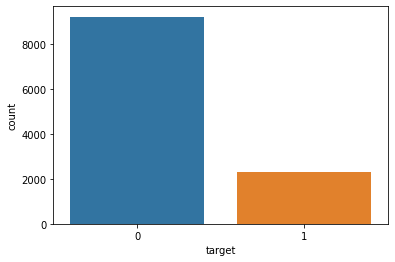

In [0]:
ax = sns.countplot(y,label="Count")
non_epileptic, epileptic = y.value_counts()
print('The number of trials for the non-epileptic class is:', non_epileptic)
print('The number of trials for the epileptic class is:', epileptic)

In [0]:
new_data.isnull().values.any()

False

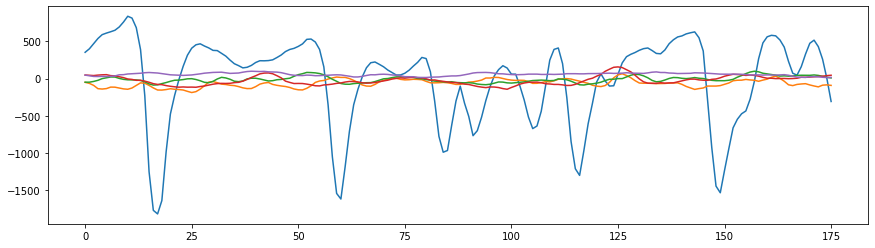

In [0]:
plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(new_data.values[i*100+1][1:-1]) for i in range(5)];

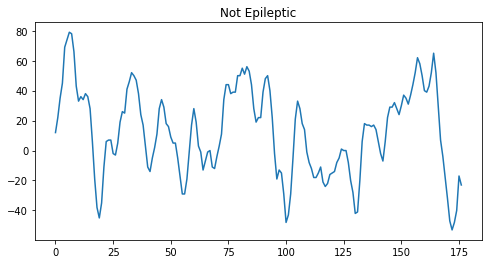

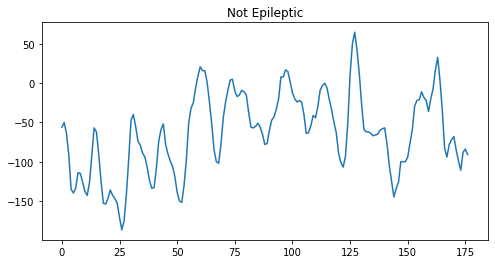

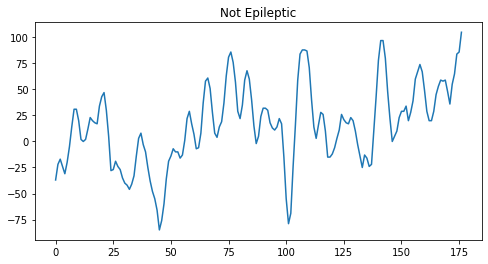

In [0]:
#some cases of Not Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(new_data[new_label['target'] == 0].iloc[i][0:-1])) for i in range(3)];

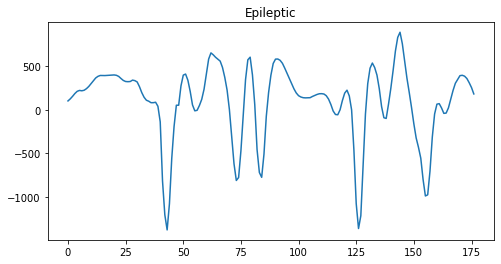

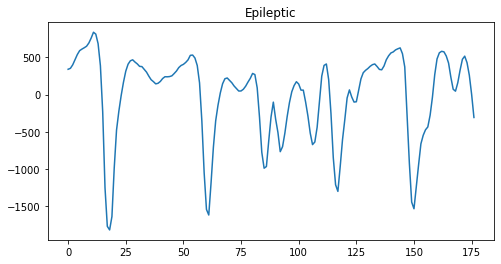

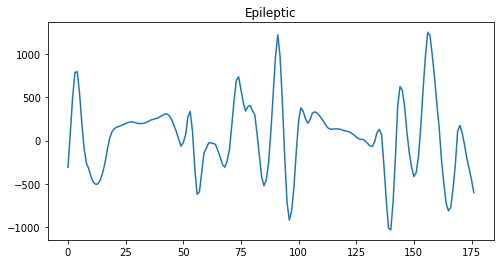

In [0]:
#some cases of Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(new_data[new_label['target'] == 1].iloc[i][0:-1])) for i in range(3)];

records of Epileptic seusizes are more smooth.

##Model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.33,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [0]:
from sklearn.metrics import accuracy_score

##Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg_pred= clf.predict(X_test_scaled)

In [0]:
acc_log_reg = accuracy_score(log_reg_pred,y_test)
acc_log_reg

0.8158102766798419

##SVM

In [0]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svc = clf.predict(X_test_scaled)
acc_svc = accuracy_score(y_pred_svc,y_test)
acc_svc

0.9652173913043478

##Linear SVM

In [0]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred_linear_svc = clf.predict(X_test_scaled)
acc_linear_svc = accuracy_score(y_pred_linear_svc,y_test)
acc_linear_svc

0.813965744400527

##KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn = clf.predict(X_test_scaled)
acc_knn = accuracy_score(y_pred_knn,y_test)
acc_knn

0.9167325428194993

##Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_gnb = clf.predict(X_test_scaled)
acc_gnb = accuracy_score(y_pred_gnb,y_test)
acc_gnb

0.9515151515151515

##Artificial Neural Networks(ANN)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train_scaled, y_train, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/100
7705/7705 [==============================] - 1s 142us/step - loss: 0.1947 - accuracy: 0.9520
Epoch 2/100
7705/7705 [==============================] - 1s 131us/step - loss: 0.0912 - accuracy: 0.9730
Epoch 3/100
7705/7705 [==============================] - 1s 126us/step - loss: 0.0733 - accuracy: 0.9781
Epoch 4/100
7705/7705 [==============================] - 1s 126us/step - loss: 0.0618 - accuracy: 0.9794
Epoch 5/100
7705/7705 [==============================] - 1s 126us/step - loss: 0.0515 - accuracy: 0.9820
Epoch 6/100
7705/7705 [==============================] - 1s 124us/step - loss: 0.0453 - accuracy: 0.9822
Epoch 7/100
7705/7705 [==============================] - 1s 126us/step - loss: 0.0402 - accuracy: 0.9856
Epoch 8/100
7705/7705 [==============================] - 1s 135us/step - loss: 0.0345 - accuracy: 0.9882
Epoch 9/100
7705/7705 [==============================] - 1s 125us/step - loss: 0.0299 - accuracy: 0.9888
Epoch 10/100
7705/7705 [==============================]

In [0]:
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
acc_ANN = accuracy_score(y_pred,y_test)
acc_ANN

0.9702239789196311

##RNN

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, SimpleRNN,LSTM,Activation,Dropout
import os

In [0]:
X_train_scaled[0].shape

(178,)

In [0]:
X_train_s =X_train_scaled.reshape(-1, 1, 178)
X_test_s  =X_test_scaled.reshape(-1, 1, 178)
y_train_s = y_train.values.reshape(-1, 1)
y_test_s = y_test.values.reshape(-1, 1)

# model = Sequential()
# model.add(LSTM(100, input_shape=(1, 9), return_sequences=True))
# model.add(LSTM(5, input_shape=(1, 9), return_sequences=True))
# model.compile(loss="mean_absolute_error", optimizer="adam", metrics= ['accuracy'])

# history = model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))

In [0]:
def build_RNN():
    model = Sequential() 
    model.add(LSTM(128,input_shape=(1,178),return_sequences=True))  
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(1))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    # model.add(Flatten())
    # model.add(Activation('sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
    return model

In [0]:
model_rnn = build_RNN()
model_rnn.summary()
history_rnn = model_rnn.fit(X_train_s,y_train_s,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2)



Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 1, 128)            157184    
_________________________________________________________________
activation_56 (Activation)   (None, 1, 128)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 1)                 520       
_________________________________________________________________
activation_57 (Activation)   (None, 1)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 2         
Total params: 157,706
Trainable params: 157,706
Non-trainable params: 0
_______________________________________________

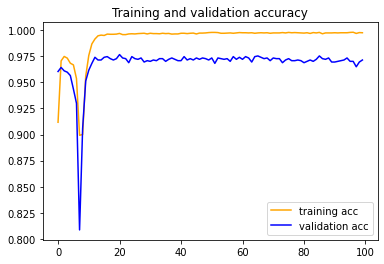

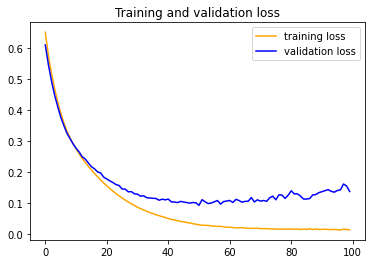

In [0]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
pred = model_rnn.predict(X_test_s)
rnn_pred = (pred > 0.5)
acc_rnn = accuracy_score(rnn_pred,y_test_s)
acc_rnn

0.9728590250329381

##CNN

In [0]:
X_train_d = np.expand_dims(X_train_scaled, -1)
X_test_d = np.expand_dims(X_test_scaled, -1)
# X_validate_d = np.expand_dims(X_validate, -1)

In [0]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
epochs = 50
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Dropout(0.1))

model_cnn.add(Conv1D(64, 2, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Dropout(0.2))

# model_cnn.add(Conv1D(128, 2, activation='relu'))
# model_cnn.add(BatchNormalization())
# model_cnn.add(Dropout(0.3))

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.5))

model_cnn.add(Dense(1, activation='sigmoid'))

In [0]:
model_cnn.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 177, 32)           96        
_________________________________________________________________
batch_normalization_13 (Batc (None, 177, 32)           128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 88, 32)            0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 88, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 87, 64)            4160      
_________________________________________________________________
batch_normalization_14 (Batc (None, 87, 64)            256       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 43, 64)          

In [0]:
model_cnn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['acc'])
r = model_cnn.fit(X_train_d, y_train, 
              validation_split=0.2,
              batch_size=200, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 6164 samples, validate on 1541 samples
Epoch 1/50
6164/6164 [==============================] - 4s 663us/step - loss: 0.3187 - acc: 0.9319 - val_loss: 0.2533 - val_acc: 0.9403
Epoch 2/50
6164/6164 [==============================] - 4s 570us/step - loss: 0.1181 - acc: 0.9578 - val_loss: 0.1257 - val_acc: 0.9546
Epoch 3/50
6164/6164 [==============================] - 4s 577us/step - loss: 0.1051 - acc: 0.9638 - val_loss: 0.1370 - val_acc: 0.9455
Epoch 4/50
6164/6164 [==============================] - 4s 573us/step - loss: 0.0774 - acc: 0.9711 - val_loss: 0.1680 - val_acc: 0.9409
Epoch 5/50
6164/6164 [==============================] - 4s 573us/step - loss: 0.0726 - acc: 0.9727 - val_loss: 0.1843 - val_acc: 0.9422
Epoch 6/50
6164/6164 [==============================] - 4s 579us/step - loss: 0.0617 - acc: 0.9799 - val_loss: 0.1741 - val_acc: 0.9448
Epoch 7/50
6164/6164 [==============================] - 5s 768us/step - loss: 0.0565 - acc: 0.9804 - val_loss: 0.1651 - val_acc: 0.9461


In [0]:
pred = model_cnn.predict(X_test_d)
cnn_pred = (pred > 0.5)
acc_cnn = accuracy_score(cnn_pred,y_test)
acc_cnn

0.9823451910408432

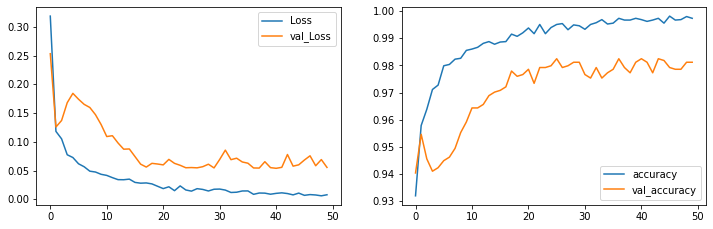

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['acc'], label='accuracy')
plt.plot(r.history['val_acc'], label='val_accuracy')
plt.legend()

##Accuracy_Comparison

In [0]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','ANN', 
              'KNN', 'Naive Bayes','RNN','Linear_SVM','CNN'],
    
    'Score': [acc_log_reg, acc_svc,acc_ANN , 
              acc_knn, acc_gnb ,acc_rnn,acc_linear_svc,acc_cnn]
    })

models.sort_values(by='Score', ascending=False)


,Model,Score
7,CNN,0.982345
5,RNN,0.972859
2,ANN,0.970224
1,Support Vector Machines,0.965217
4,Naive Bayes,0.951515
3,KNN,0.916733
0,Logistic Regression,0.815810
6,Linear_SVM,0.813966
